# Potts Model

In [1]:
from PottsModel import PottsModel

import numpy as np
import matplotlib.pyplot as plt

/Users/bertdepoorter/Nextcloud/Documents/School/Universiteit/Monte Carlo Methods/PottsModel.py:119: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [i, int((j+1+N)%N)]       # right neighbour


## Functionality
The Potts Model class has the following functions available:
- initialize spins: create a lattice with spins randomly assigned
- calculate_energy: calculate the energy of a given spin configuration
- get_neighbours: get the indices of the neighbouring entries under specific boundary conditions
- sample_spin_configurations: sample a given number of spin configurations for a specified sampling method
  (Options are 'heat bath' and 'metropolis')
- get_magnetization: calculate total magnetization for a given spin configuration
- plot_magnetization: create plot similar to figure 3 in lecture notes for a specified number of chains.


In [12]:
# specify parameters
N = 20
num_samples = 10000

In [13]:
# initialize model with heat bath sampling
model_heat_bath = PottsModel(
    N,
    10, 
    sampling_method='heat bath'
)

In [14]:
# run sampling
chain_heat_bath = model_heat_bath.sample_spin_configurations(num_samples)

In [15]:
# Initialize model with metropolis sampling
model_metropolis = PottsModel(
    N, 
    10,
    sampling_method='metropolis'
)

In [16]:
# run sampling
chain_metropolis=model_metropolis.sample_spin_configurations(num_samples)

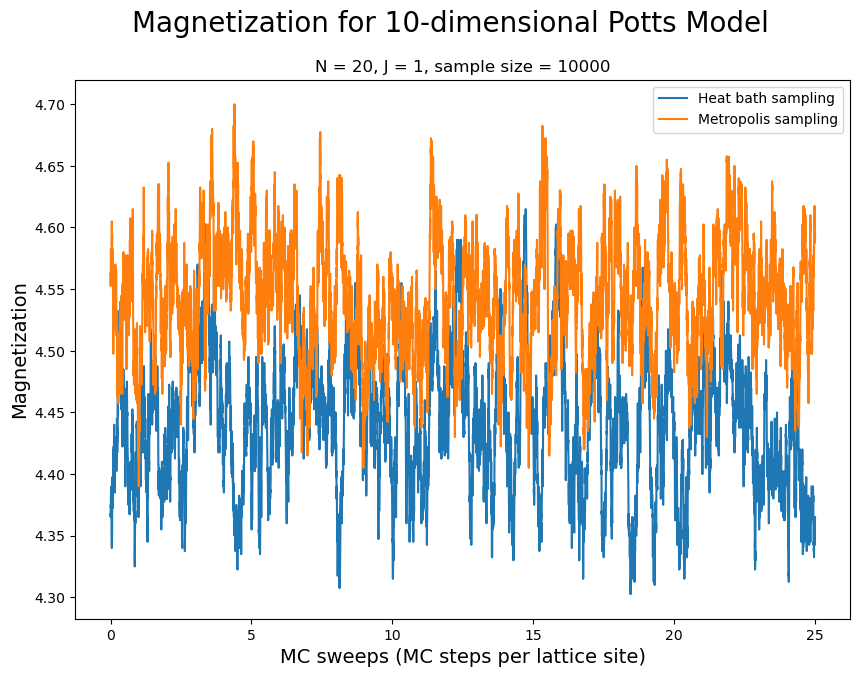

In [17]:
# Make plot of both sampling methods

# create array of chains
spin_samples = np.asarray([chain_heat_bath, chain_metropolis])

# Create plot
model_metropolis.plot_magnetizations(
    num_samples, 
    chains=2, 
    spin_samples=spin_samples, 
    chain_labels=['Heat bath sampling', 'Metropolis sampling']
)

In [18]:
M_metropolis = model_metropolis.magnetization_chain(chain_metropolis)
M_avg_metropolis = np.sum(M_metropolis)/len(M_metropolis)
print(M_avg_metropolis)

4.543612388761124


In [19]:
M_heat_bath = model_heat_bath.magnetization_chain(chain_heat_bath)
M_avg_heat_bath = np.sum(M_heat_bath)/len(M_heat_bath)
print(M_avg_heat_bath)

4.441665583441655


In [20]:
# create plot of internal energies
E_metropolis = np.zeros(len(chain_metropolis))
E_heat = np.zeros(len(chain_heat_bath))

for k in range(len(chain_metropolis)):
    E_metropolis[k] = model_heat_bath.calculate_energy(chain_heat_bath[k])
    E_heat[k] = model_metropolis.calculate_energy(chain_metropolis[k])

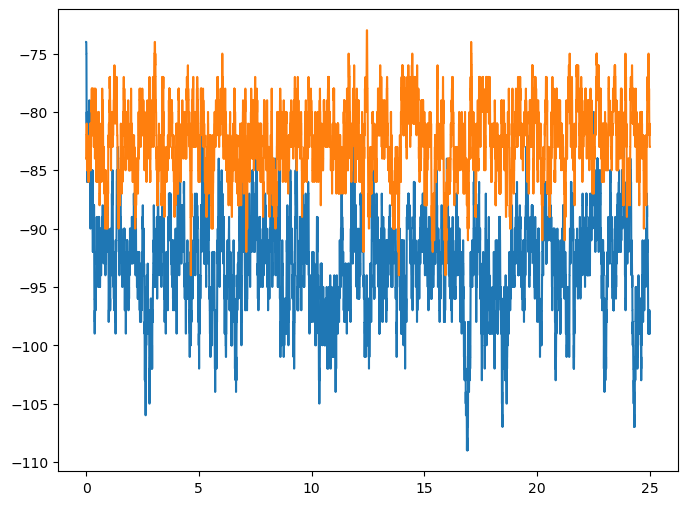

In [21]:
MC_sweeps = np.linspace(0, len(chain_metropolis), len(chain_metropolis))/N**2

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(MC_sweeps, E_metropolis, label='Energy of metropolis sampling')
ax.plot(MC_sweeps, E_heat, label='Energy of heat bath sampling')